In [1]:
import numpy as ny
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_table('datingTestSet.txt',header=None)
df.columns = [
    '年飞行常客里程数',
    '玩游戏视频所占时间百分比',
    '每周消费冰淇淋公升数',
    'label'
]
df

df_map = {
    1:'didntLike',
    2:'smallDoses',
    3:'largeDoses'
}



In [3]:
Colors = []
# 添加颜色
for l in df.iloc[:,-1]:
    if (l == 'didntLike'):
        Colors.append('gray')
    elif(l == 'smallDoses'):
        Colors.append('orange')
    elif(l == 'largeDoses'):
        Colors.append('red')

len(Colors)

1000

<function matplotlib.pyplot.show(close=None, block=None)>

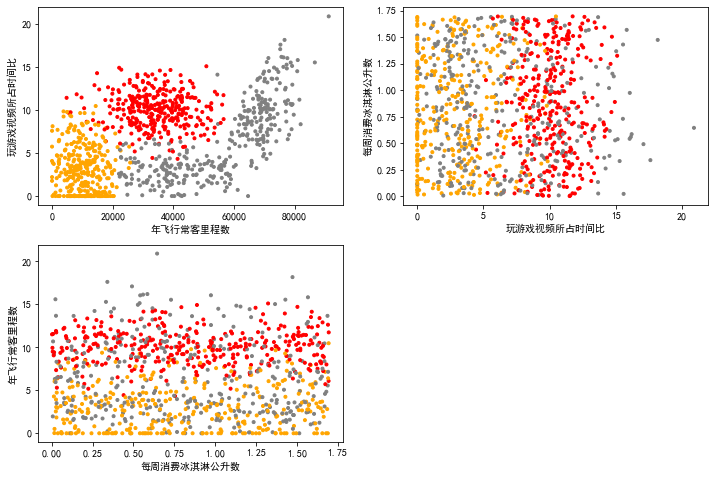

In [4]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
p1 = plt.figure(figsize=(12,8))
#绘制图一
fig1 = p1.add_subplot(221)
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker='.',c=Colors)
plt.xlabel('年飞行常客里程数')
plt.ylabel('玩游戏视频所占时间比')
#绘制图二
fig1 = p1.add_subplot(222)
plt.scatter(df.iloc[:,1],df.iloc[:,2],marker='.',c=Colors)
plt.xlabel('玩游戏视频所占时间比')
plt.ylabel('每周消费冰淇淋公升数')
#绘制图三
fig1 = p1.add_subplot(223)
plt.scatter(df.iloc[:,2],df.iloc[:,1],marker='.',c=Colors)
plt.xlabel('每周消费冰淇淋公升数')
plt.ylabel('年飞行常客里程数')
plt.show

In [5]:
# 归一化处理
def Norm(df):
    ds=df.iloc[:,:-1]
    min =ds.min()
    max =ds.max()
    return  (ds-min)/(max-min)


In [6]:
df.iloc[0:,:-1] = Norm(df)
df

,年飞行常客里程数,玩游戏视频所占时间百分比,每周消费冰淇淋公升数,label
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike
...,...,...,...,...
995,0.122106,0.163037,0.372224,smallDoses
996,0.754287,0.476818,0.394621,didntLike
997,0.291159,0.509103,0.510795,largeDoses
998,0.527111,0.436655,0.429005,largeDoses


In [7]:
new_date = [0.479488,0.509103,0.510705]

def classify_1(inX,dataSet,k):
    df = pd.DataFrame(dataSet)
    dist = ((df.iloc[:,0:-1] - inX)**2).sum(axis=1)**0.5
    dist_f  = pd.DataFrame({
    'dist':dist,
    'label':df.iloc[:,-1]
    })
    dist_f.sort_values(by='dist')[:k].value_counts('label')
    re = dist_f.sort_values(by='dist')[:k].value_counts('label')
    return re.index[0]
classify_1(new_date,df,3)

'largeDoses'

In [8]:
def randSplit(df,ratio=0.9):
    m = df.shape[0]
    m_t = int(m * 0.9)
    test = df.iloc[m_t:m]
    test.index = range(0,m-m_t)
    return df.iloc[:m_t],test
train,test = randSplit(df)
test
# train

,年飞行常客里程数,玩游戏视频所占时间百分比,每周消费冰淇淋公升数,label
0,0.513766,0.170320,0.262181,didntLike
1,0.089599,0.154426,0.785277,smallDoses
2,0.611167,0.172689,0.915245,didntLike
3,0.012578,0.000000,0.195477,smallDoses
4,0.110241,0.187926,0.287082,smallDoses
...,...,...,...,...
95,0.122106,0.163037,0.372224,smallDoses
96,0.754287,0.476818,0.394621,didntLike
97,0.291159,0.509103,0.510795,largeDoses
98,0.527111,0.436655,0.429005,largeDoses


In [9]:
def getNF(File):
    df = pd.read_table(File,header=None)
    df.iloc[:,:-1] = Norm(df)
    return df

A = ['datingTestSet.txt','datingTestSet2.txt']
train2,test2 = list(map(getNF,A))

In [10]:
test2[3] = test2[3].map(df_map)

In [15]:
def datingTest(train,test,k):
    predict = []
    for _,row in test.iterrows():
    # 舍弃一列 label
        new_date = row[:-1]
        pred = classify_1(new_date,train,k)
        predict.append(pred)
    # 增加一列 predict
    test.loc[:,'predict'] = predict

    acc = (test.iloc[:,-1] == test.iloc[:,-2]).mean()

    return acc

datingTest(train,test,3)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4468\2317296177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'predict'] = predict


0.94

In [16]:
datingTest(train2,test2,3)

0.973